Associated business report: https://docs.google.com/document/d/1bOUFcjRdFu4cve4mdRQ8fbdT1ceCsV2kjNwqdcMeY_g/edit?usp=sharing

# 1. PROBLEM 1: LINEAR REGRESSION

1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null
values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. (8 marks)

1.2) Impute null values if present? Do you think scaling is necessary in this case? (8 marks)

1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and
train (30:70). Apply Linear regression. Performance Metrics: Check the performance of Predictions
on Train and Test sets using R-square, RMSE. (8 marks)

1.4) Inference: Based on these predictions, what are the business insights and recommendations.
(6 marks)


### 1.1. INITIAL STEPS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_firm = pd.read_csv("/content/Firm_level_data (9).csv")

Let's read the initial rows of the data

In [ ]:
df_firm.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [ ]:
df_firm.drop(['Unnamed: 0'], axis=1, inplace=True)

Inspecting the overall information about the dataset

In [ ]:
df_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


Let's view the dataframe shape

In [ ]:
df_firm.shape

(759, 9)

Let's view the statistical properties of the columns of the dataframe

In [ ]:
df_firm.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,738.000000,759.000000,759.000000
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.139309,2054.160386,60.510000
max,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000


Checking null values

In [ ]:
df_firm.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

### 1.2. UNIVARIATE ANALYSIS

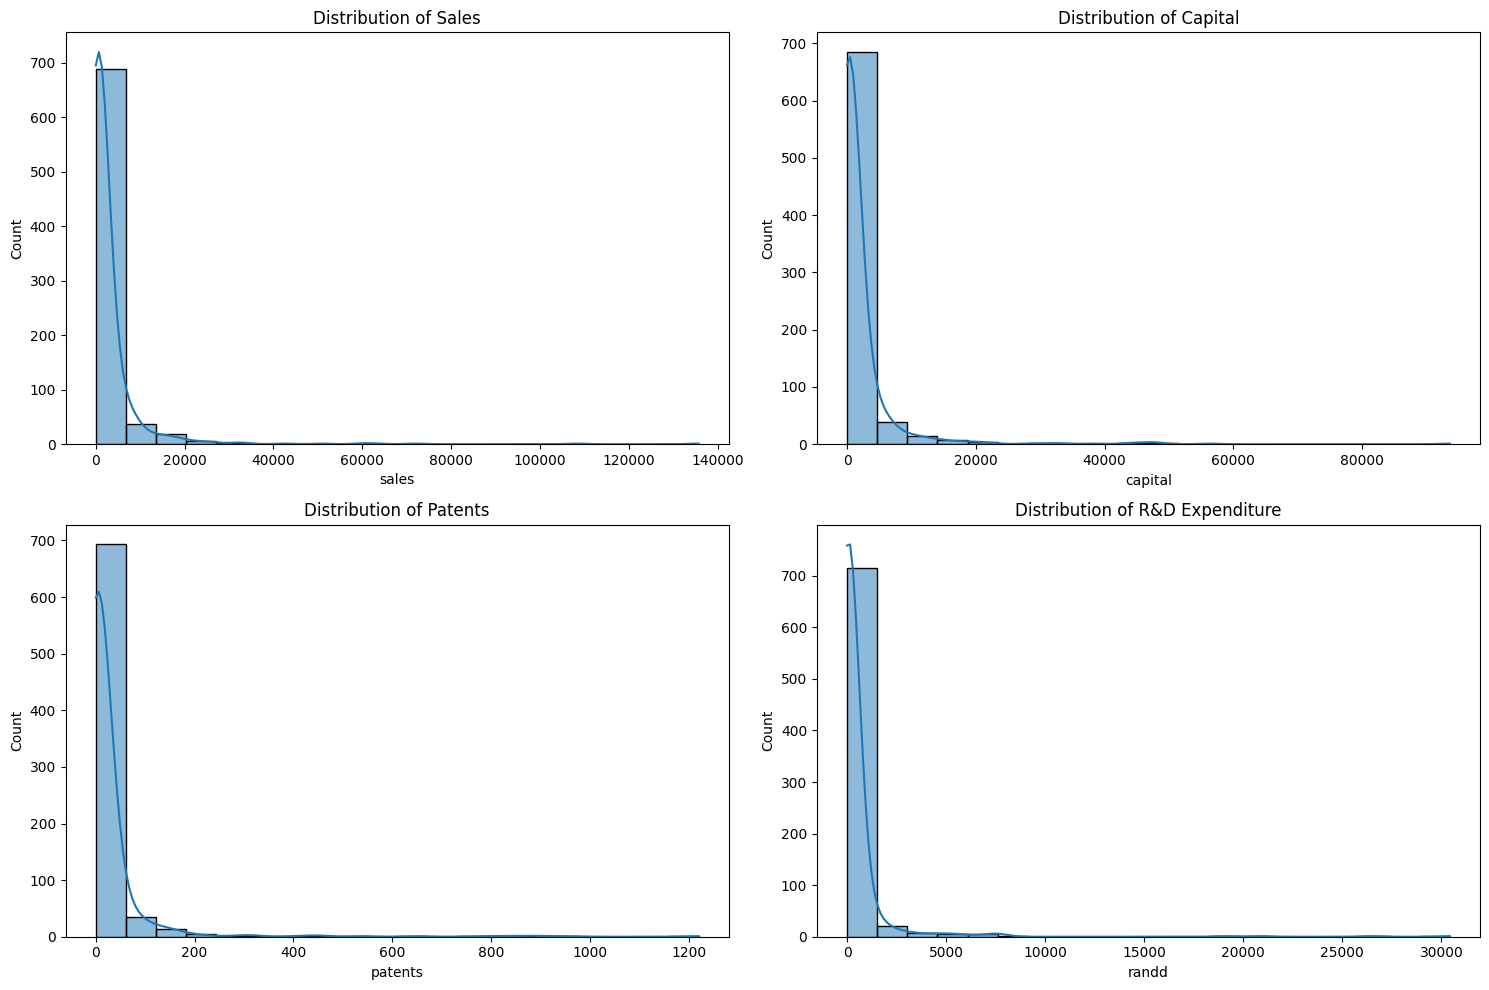

In [ ]:

# Univariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_firm['sales'], bins=20, kde=True)
plt.title('Distribution of Sales')

plt.subplot(2, 2, 2)
sns.histplot(df_firm['capital'], bins=20, kde=True)
plt.title('Distribution of Capital')

plt.subplot(2, 2, 3)
sns.histplot(df_firm['patents'], bins=20, kde=True)
plt.title('Distribution of Patents')

plt.subplot(2, 2, 4)
sns.histplot(df_firm['randd'], bins=20, kde=True)
plt.title('Distribution of R&D Expenditure')

plt.tight_layout()
plt.show()


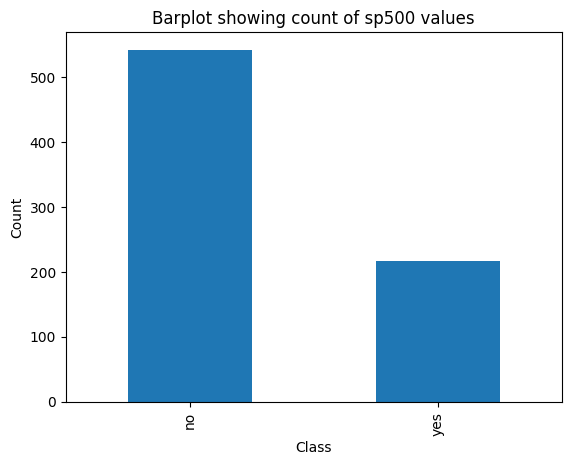

In [ ]:
df_firm['sp500'].value_counts().plot(kind='bar')
plt.title("Barplot showing count of sp500 values")
plt.xlabel("Class")
plt.ylabel("Count");

In [ ]:
df_firm.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

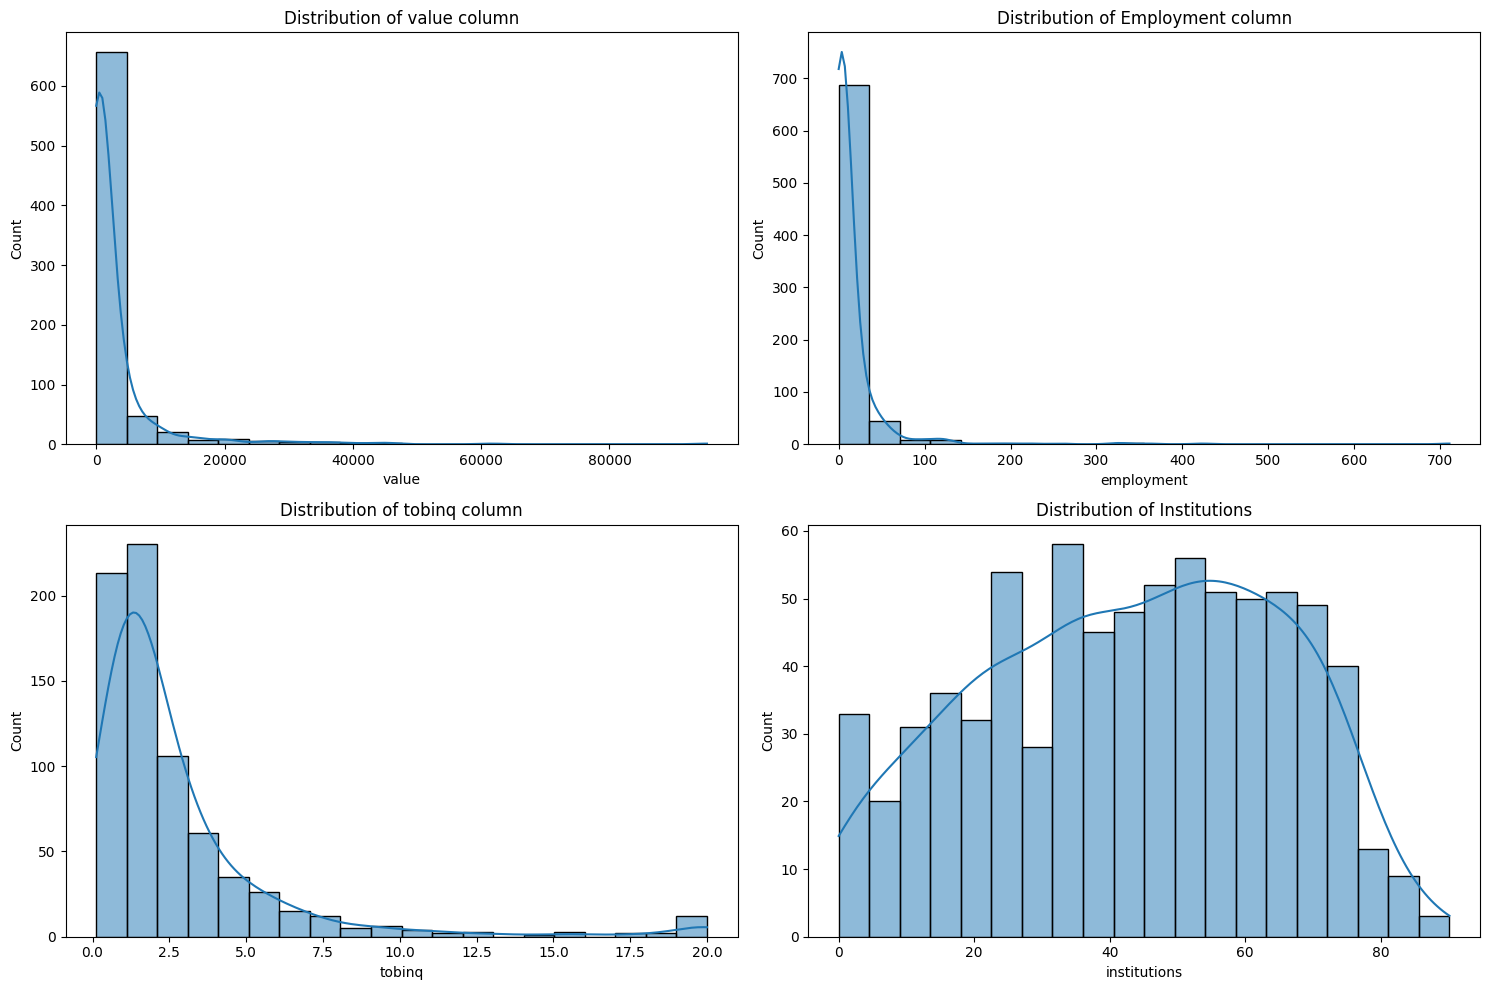

In [ ]:

# Univariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_firm['value'], bins=20, kde=True)
plt.title('Distribution of value column')

plt.subplot(2, 2, 2)
sns.histplot(df_firm['employment'], bins=20, kde=True)
plt.title('Distribution of Employment column')

plt.subplot(2, 2, 3)
sns.histplot(df_firm['tobinq'], bins=20, kde=True)
plt.title('Distribution of tobinq column')

plt.subplot(2, 2, 4)
sns.histplot(df_firm['institutions'], bins=20, kde=True)
plt.title('Distribution of Institutions')

plt.tight_layout()
plt.show()


We can see that the distribution of these columns is heavily skewed on the left.

### 1.3. BIVARIATE ANALYSIS


**Checking correlation between Sales and Value**

In [ ]:
df_firm['sales'].corr(df_firm['value'])

0.7137776334470751

We can see that these two columns are positively correlated

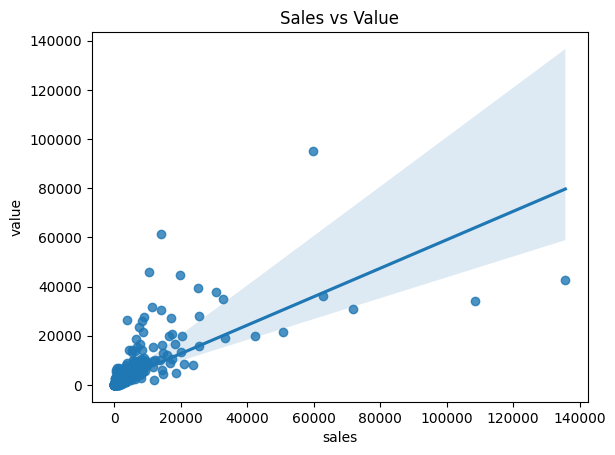

In [ ]:
sns.regplot(data=df_firm, x='sales', y='value')
plt.title('Sales vs Value');

**Checking the correlation between Capital and Value**

In [ ]:
df_firm['capital'].corr(df_firm['value'])

0.7151881025538102

Again a close correlation between these two features, verified by the regression plot below

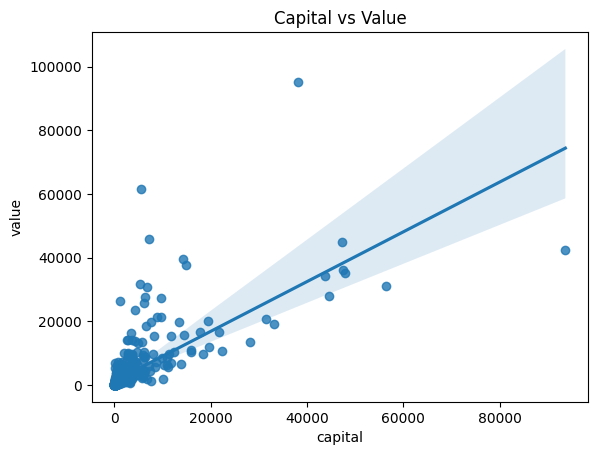

In [ ]:
sns.regplot(data=df_firm, x='capital', y='value')
plt.title('Capital vs Value');

**Checking the relation between Tobin's Q and value column.**

In [ ]:
df_firm['tobinq'].corr(df_firm['value'])

-0.006137036631792905

We can see that there is no correlation between them, verified by the regression plot below

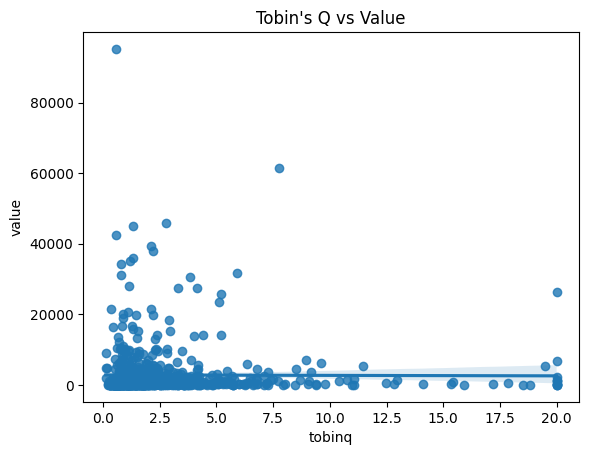

In [ ]:
sns.regplot(data=df_firm, x='tobinq', y='value')
plt.title('Tobin\'s Q vs Value');


**Let's view a correlation heatmap of the numerical columns to better assess the relationship between them.**

**From the correlation heatmap, the most important attributes are "capital", "patents", "randd", "employment", and "value", as they have the highest positive correlation with the target variable "Sales".**

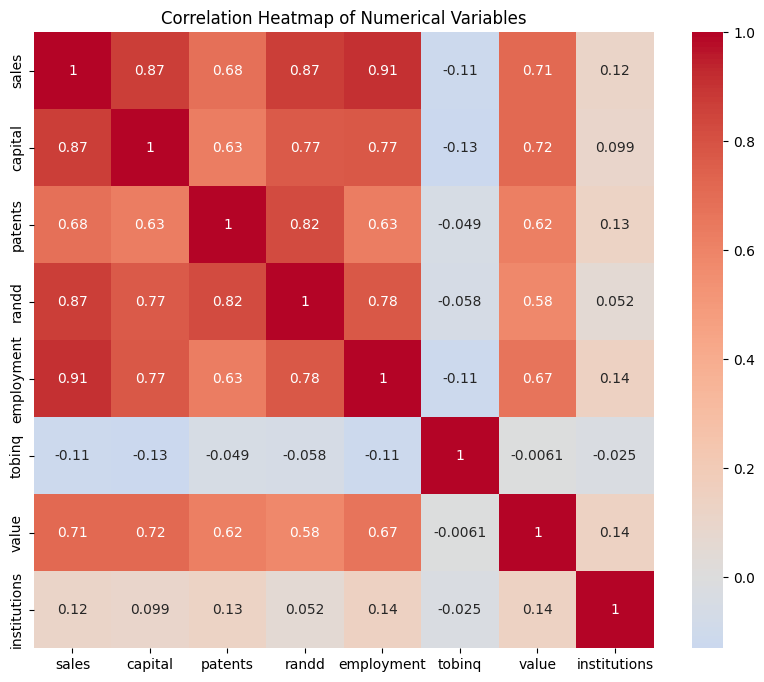

In [ ]:
numerical_cols = ['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']

# Correlation heatmap of numerical variables
correlation_matrix = df_firm[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### 1.4. SCALING ALL NUMBERICAL FEATURES

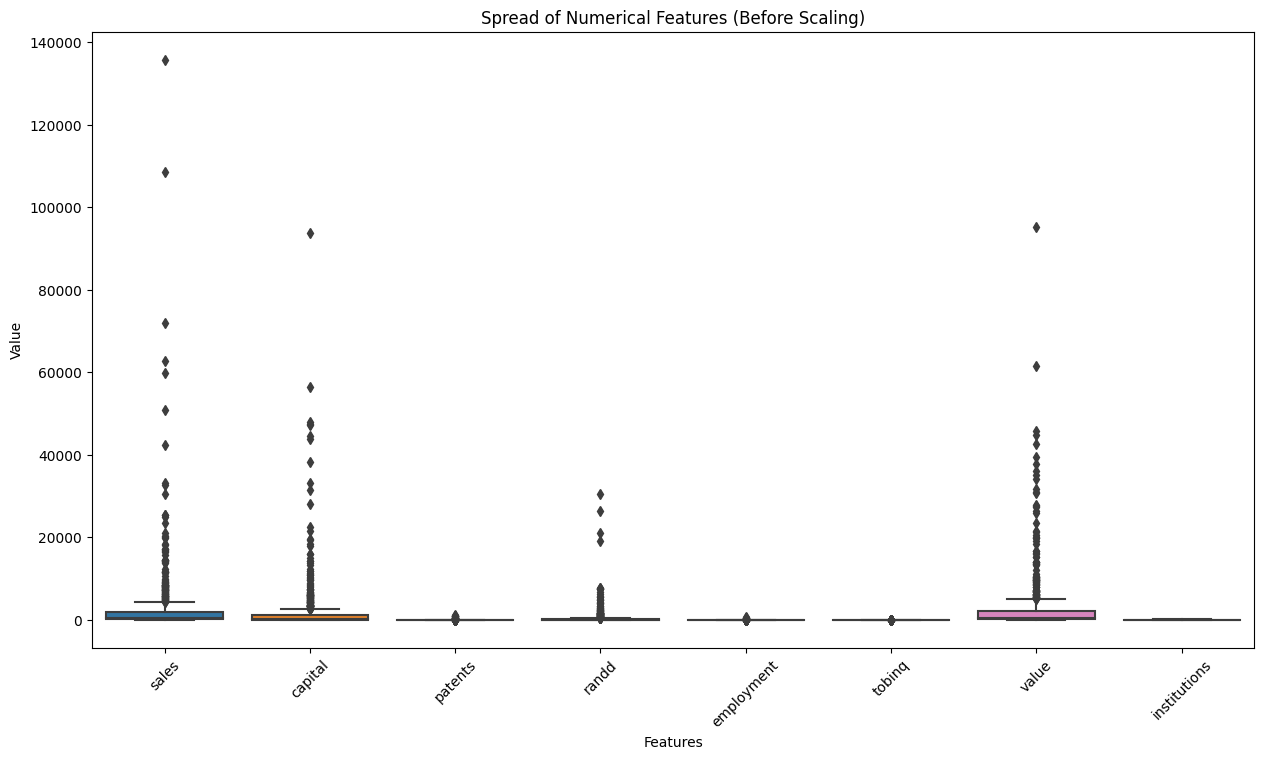

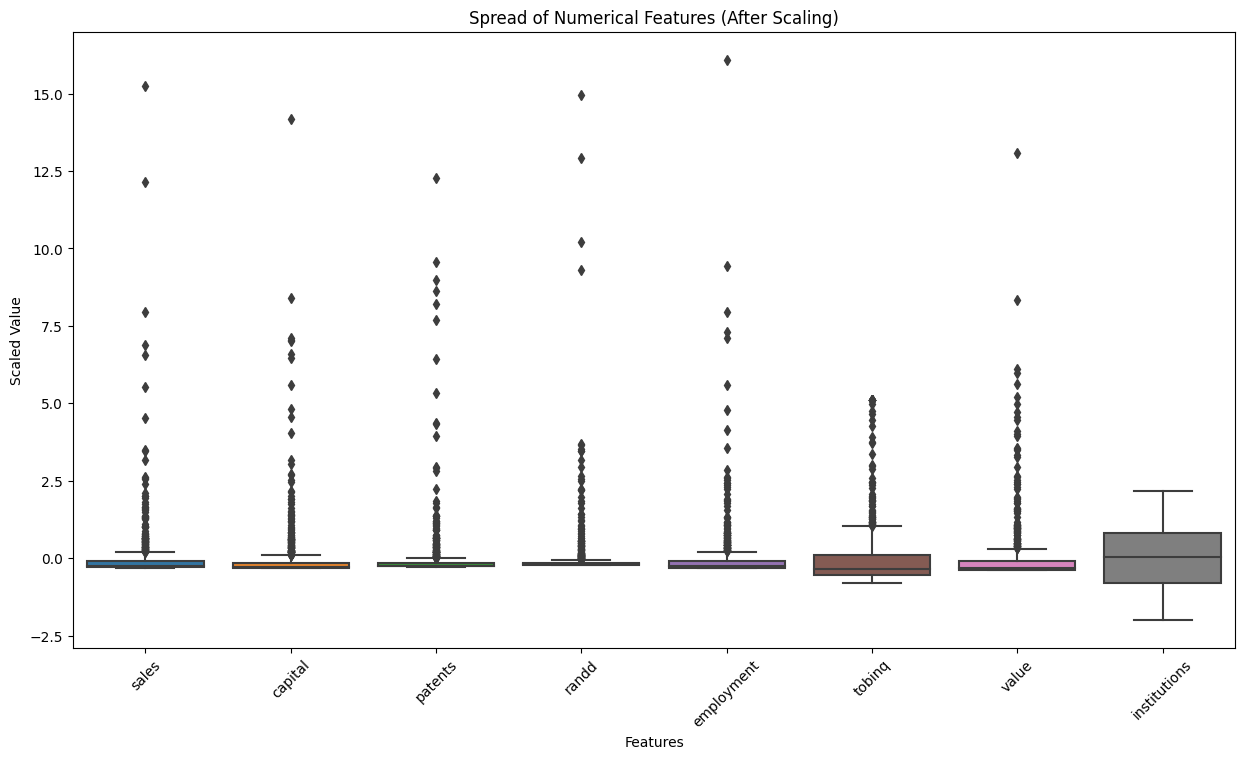

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Extract numerical columns
numerical_cols = ['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']

# Display spread of numerical features before scaling
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_firm[numerical_cols])
plt.title('Spread of Numerical Features (Before Scaling)')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df_firm_scaled = df_firm.copy()
df_firm_scaled[numerical_cols] = scaler.fit_transform(df_firm[numerical_cols])

# Display spread of numerical features after scaling
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_firm_scaled[numerical_cols])
plt.title('Spread of Numerical Features (After Scaling)')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Scaled Value')
plt.show()


From above figure, we can see that before scaling, the values in most columns were too far away from the mean. After scaling, we have brought the values closer to each other. So scaling definitely helped to reduce the overall spread of the values in our numerical columns.

### 1.5. BUILDING, TRAINING, AND TESTING THE MODEL ON THE FEATURES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Drop rows with missing values after imputing
df_firm.dropna(inplace=True)

# Encode categorical variable 'sp500'
df_firm_encoded = pd.get_dummies(df_firm, columns=['sp500'], drop_first=True)

# Splitting data into train (70%) and test (30%) sets
X = df_firm_encoded.drop('sales', axis=1)
y = df_firm_encoded['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R-squared: 0.9385
Test R-squared: 0.8599
Train RMSE: 2405.6006
Test RMSE: 2379.3595


### 1.6. INFERENCES AND CONCLUSIONS

Good Fit for Test Set: The test R-squared value of 0.7504 indicates that the model explains about 75.04% of the variance in the 'value' of firms in the test set. This is a reasonably good result, as it suggests that the model is capturing a significant portion of the underlying patterns in the data.

Overfitting Concerns: The difference between the train and test R-squared values is noticeable (0.9385 vs. 0.8599). While the test R-squared is high, the gap suggests the possibility of overfitting, where the model may have learned noise in the training data. Monitoring and addressing overfitting could improve the model's generalization to new data.

RMSE Interpretation: The RMSE values indicate the average prediction error of the model. The train RMSE of 2405 and test RMSE of 2379 indicates that the model has performed with similar results on both the training and testing datasets.

Dataset skewness: Most of the dataset features were highly skewed on the left, with the exception of the institutions features. For best results, we should inspect the reason for this skewness, and scale down the features.

Most important attributes for predicting sales: The most important attributes are "capital", "patents", "randd", "employment", and "value", as they have the highest positive correlation with the target variable "Sales".

Importance of scaling: Feature scaling greatly helped to reduce the overall variance among the features.

<BR/>
<BR/>
<BR/>
<BR/>

<BR/>
<BR/>
<BR/>

# 2. LOGISTIC REGRESSION AND LDA

### 2.1. INITIAL ANALYSIS

In [ ]:
import pandas as pd

# Read the dataset
df_car_crash = pd.read_csv('/content/Car_Crash (9).csv')

# Display basic information about the dataset
df_car_crash.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [ ]:
df_car_crash.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df_car_crash.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,4,27.078,0,1,1,1,1,32,1997,1987.0,2,0,0,4.0,2:13:2
1,2,89.627,0,0,0,0,0,54,1997,1994.0,1,0,0,4.0,2:17:1
2,4,27.078,0,1,0,1,1,67,1997,1992.0,2,0,0,4.0,2:79:1
3,4,27.078,0,1,0,1,0,64,1997,1992.0,2,1,0,4.0,2:79:1
4,4,13.374,0,1,1,1,1,23,1997,1986.0,2,0,0,4.0,4:58:1


In [ ]:
# Descriptive statistics
df_car_crash.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11140.000000
mean,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.825583
std,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [ ]:

# Check for null values
df_car_crash.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [ ]:
# Fill missing values in 'injSeverity' column with the mode
mode_injSeverity = df_car_crash['injSeverity'].mode()[0]
df_car_crash['injSeverity'].fillna(mode_injSeverity, inplace=True)

### 2.2. UNIVARIATE ANALYSIS

**Let's check the distribution of estimated impact speeds. We can see that most impact speeds were in the range of 10-24**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

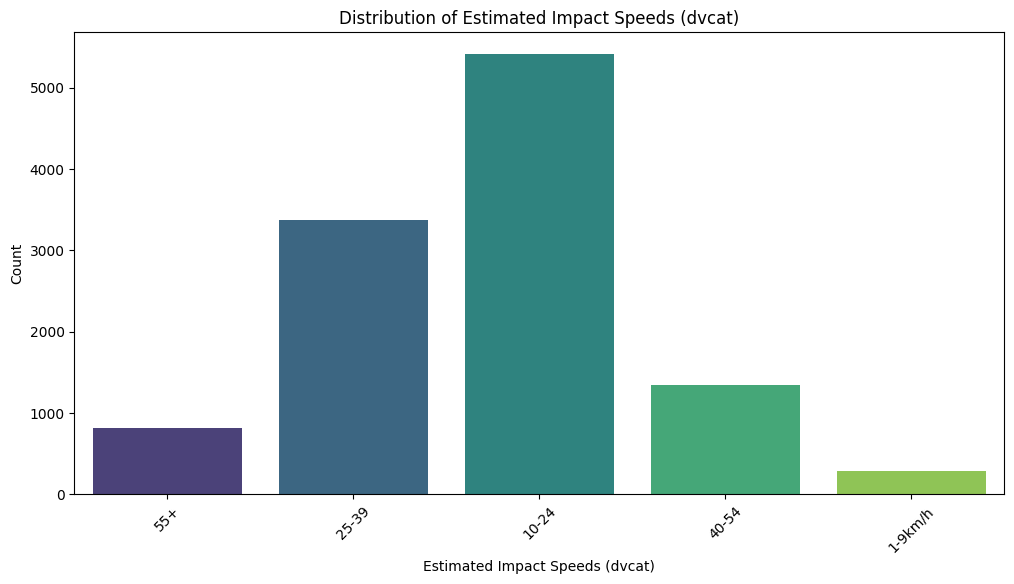

In [ ]:
# Distribution of 'dvcat' (Estimated Impact Speeds)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_car_crash, x='dvcat', palette='viridis')
plt.title('Distribution of Estimated Impact Speeds (dvcat)')
plt.xlabel('Estimated Impact Speeds (dvcat)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**By checking the distribution of gender, we can see that there is a higher proportion of males as compared to females.**

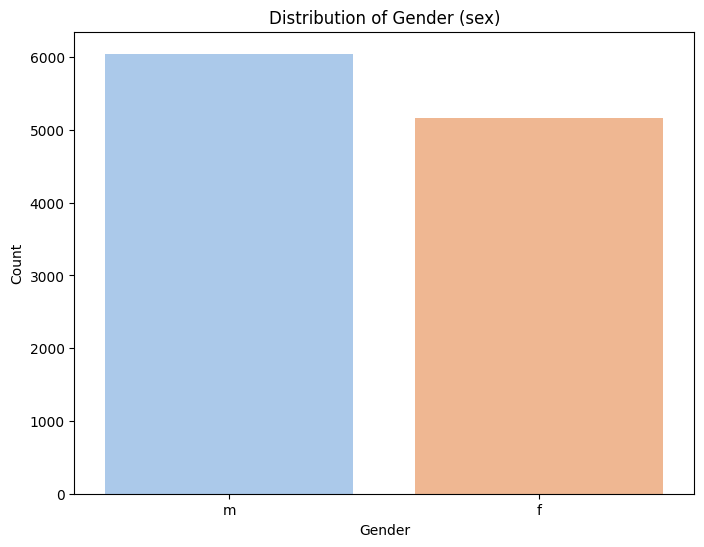

In [ ]:
# Distribution of 'sex' (Gender)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_car_crash, x='sex', palette='pastel')
plt.title('Distribution of Gender (sex)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**By checking the distribution of aribag deployment category, we can see that there are three classes, "unavail", "nodeploy", and "deploy", with "deploy" being the highest.**

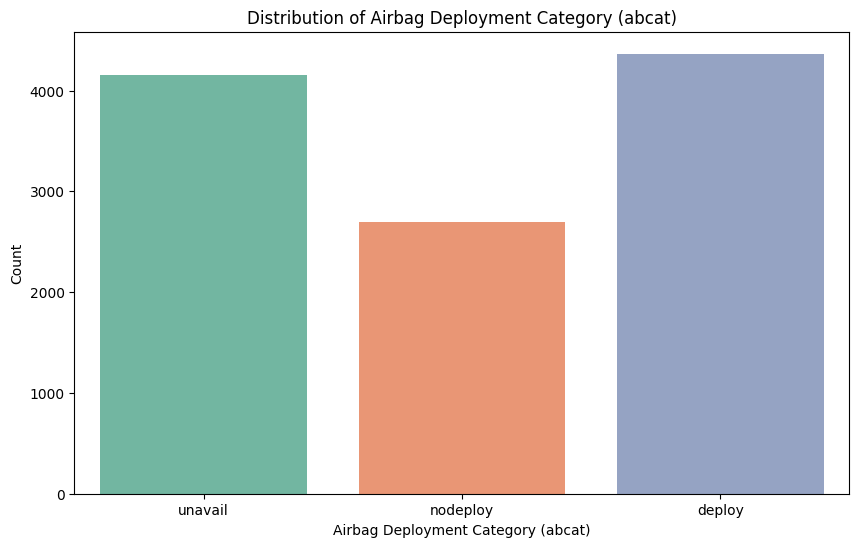

In [ ]:
# Distribution of 'abcat' (Airbag Deployment Category)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_car_crash, x='abcat', palette='Set2')
plt.title('Distribution of Airbag Deployment Category (abcat)')
plt.xlabel('Airbag Deployment Category (abcat)')
plt.ylabel('Count')
plt.show()

**By checking the countplot of occupant role, we see that the drivers were nearly 3 times more than passengers.**

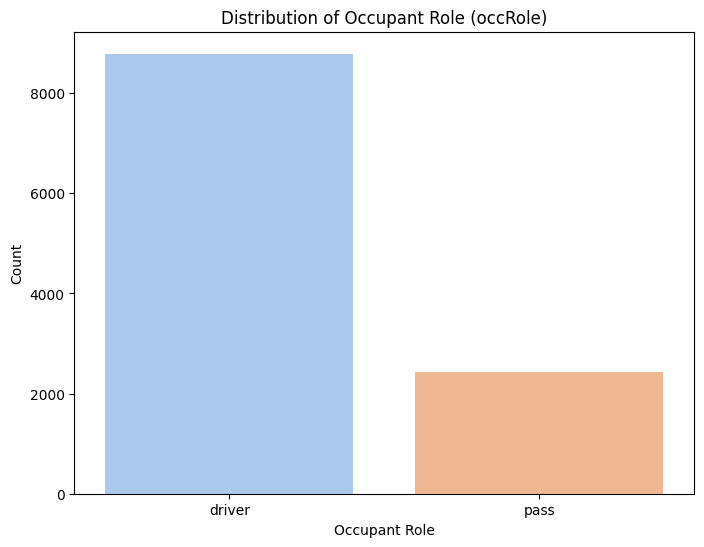

In [ ]:

# Distribution of 'occRole' (Occupant Role)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_car_crash, x='occRole', palette='pastel')
plt.title('Distribution of Occupant Role (occRole)')
plt.xlabel('Occupant Role')
plt.ylabel('Count')
plt.show()

### 2.3. BIVARIATE ANALYSIS

**The box plot shows a comparative analysis of the survived feature against the occupant age. We can observe that the distribution of "Not survived" is much greater than those of "Survived". At the same time, "Not survived" doesn't have any outliers, while "survived" has some outliers.**

**The fact that the distribution of 'Not Survived' is greater than that of 'Survived' suggests that the majority of occupants did not survive the car crashes in this dataset.**

**Moreover, the presence of outliers in the "Survived" category's box indicates that there are some instances where occupants who survived the crashes were either significantly older compared to the majority of survivors.**

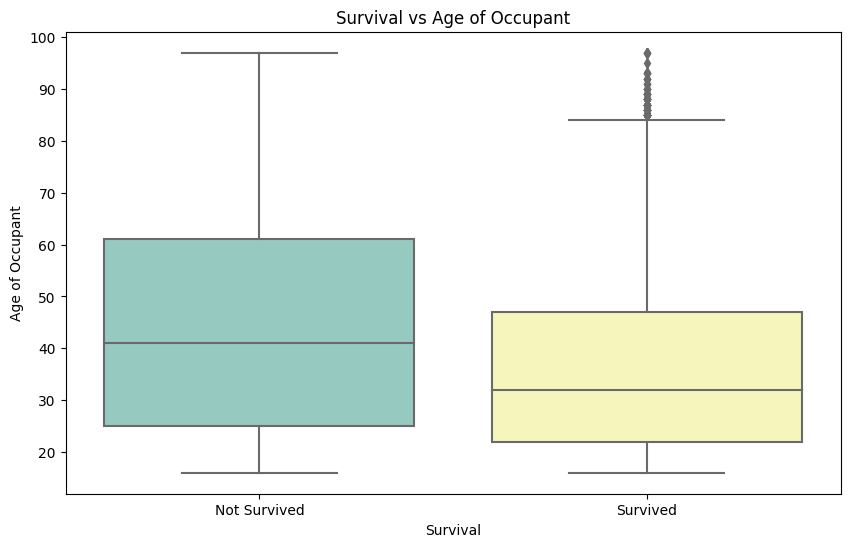

In [ ]:
# Box plot: Survival vs Age of Occupant
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car_crash, x='Survived', y='ageOFocc', palette='Set3')
plt.title('Survival vs Age of Occupant')
plt.xlabel('Survival')
plt.ylabel('Age of Occupant')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


**The box plot below shows a comaprison between the age of occupant and their gender. We can see that there were a higher number of outliers in the female category as comapred to male gender. We can also see that the IQR of male gender is between 20 and 50, while the IQR of female is more spread out, approximately between 20 and 55.**

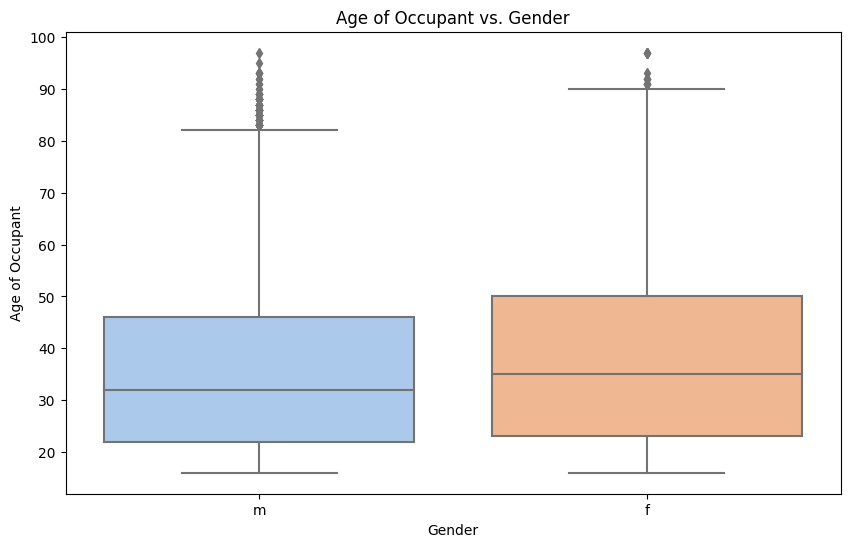

In [ ]:
# Box plot: Age of Occupant vs. Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car_crash, x='sex', y='ageOFocc', palette='pastel')
plt.title('Age of Occupant vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Age of Occupant')
plt.show()


**Looking below at the boxplot, we see a comparison between the age of occupant and the airbag deployment category. It is evident that all three categories of deployment have a similar inter-quartile range, but the number of outliers in each category vary with "deploy" category having the highest number of outliers, followed by the "unavail" category, and lastly, with the least number of outliers, we have the "nodeploy" category.**

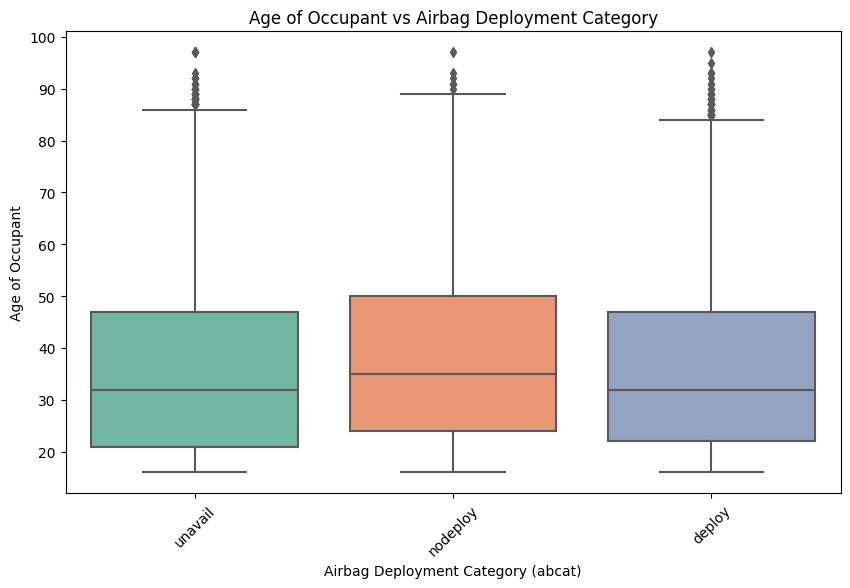

In [ ]:
# Box plot: Age of Occupant vs Airbag Deployment Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car_crash, x='abcat', y='ageOFocc', palette='Set2')
plt.title('Age of Occupant vs Airbag Deployment Category')
plt.xlabel('Airbag Deployment Category (abcat)')
plt.ylabel('Age of Occupant')
plt.xticks(rotation=45)
plt.show()

**Lastly, let's visualize a correlation heatmap between each features, with positively high correlation indicated by dark red, and lower levels indicated by light blue.**

In [ ]:
df_car_crash

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,4,27.078,0,1,1,1,1,32,1997,1987.0,2,0,0,4.0,2:13:2
1,2,89.627,0,0,0,0,0,54,1997,1994.0,1,0,0,4.0,2:17:1
2,4,27.078,0,1,0,1,1,67,1997,1992.0,2,0,0,4.0,2:79:1
3,4,27.078,0,1,0,1,0,64,1997,1992.0,2,1,0,4.0,2:79:1
4,4,13.374,0,1,1,1,1,23,1997,1986.0,2,0,0,4.0,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,2,3179.688,1,1,0,1,1,17,2002,1985.0,2,0,0,0.0,82:107:1
11213,1,71.228,1,0,0,1,1,54,2002,2002.0,1,0,0,2.0,82:108:2
11214,1,10.474,1,0,0,1,0,27,2002,1990.0,0,0,1,3.0,82:110:1
11215,2,10.474,1,0,0,1,0,18,2002,1999.0,0,0,1,0.0,82:110:2


<ipython-input-108-62690725d9a9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_car_crash.corr()


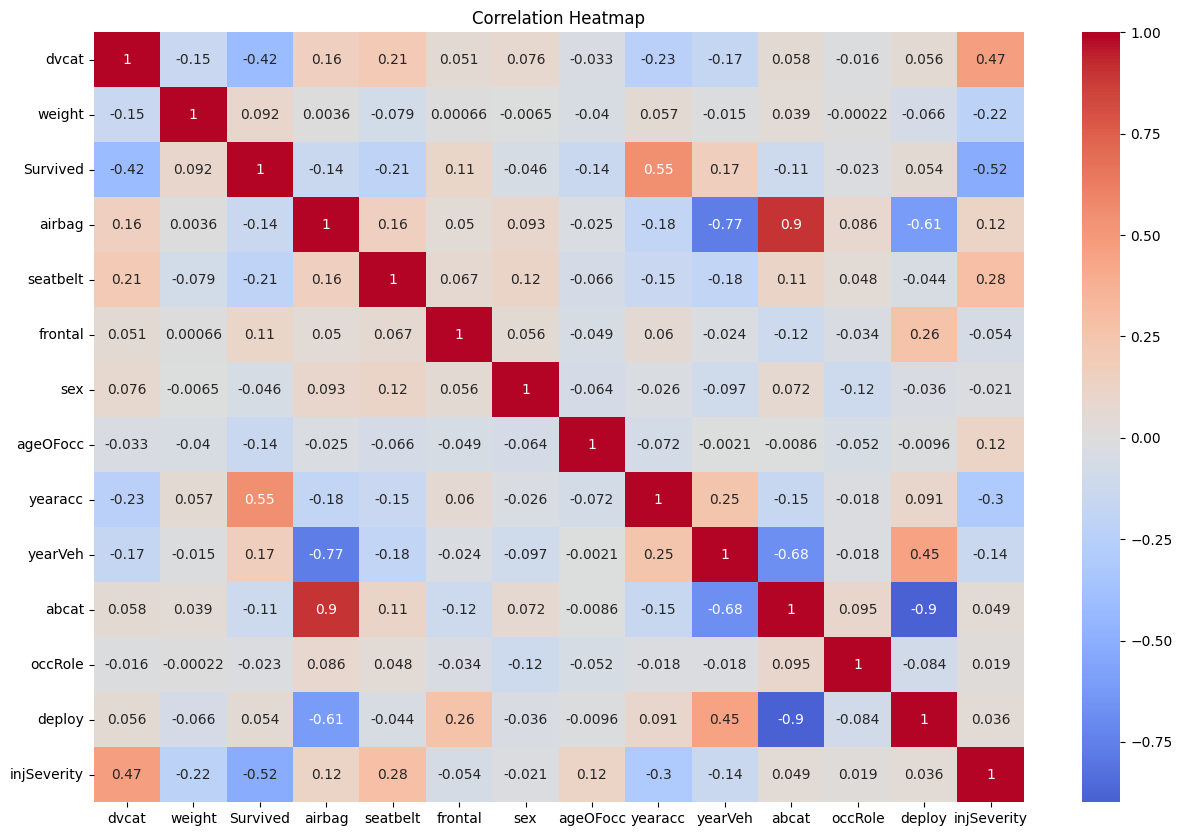

In [ ]:

# Correlation heatmap
plt.figure(figsize=(15, 10))
corr_matrix = df_car_crash.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


### 2.4. ENCODING CATEGORICAL VARIABLES AND SPLITTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['airbag', 'seatbelt', 'sex', 'abcat', 'dvcat', 'Survived', 'occRole']
for col in categorical_columns:
    df_car_crash[col] = label_encoder.fit_transform(df_car_crash[col])

# Define features and target variable
X = df_car_crash.drop(['Survived', "caseid"], axis=1)
y = df_car_crash['Survived']

# Split data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 2.5. CREATING LOGISTIC REGRESSION AND LDA MODEL AND FITTING TRAINING DATA ON THEM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize models
logreg_model = LogisticRegression(max_iter=1000)
lda_model = LinearDiscriminantAnalysis()

# Fit models on training data
logreg_model.fit(X_train, y_train)
lda_model.fit(X_train, y_train)



LinearDiscriminantAnalysis()

### 2.6. MAKING PREDICTIONS ON BOTH MODELS

In [ ]:

# Predict on training and testing data
logreg_train_preds = logreg_model.predict(X_train)
logreg_test_preds = logreg_model.predict(X_test)


lda_train_preds = lda_model.predict(X_train)
lda_test_preds = lda_model.predict(X_test)


In [ ]:
print("Training predictions by LDA: \n")
print(lda_train_preds)

print("Testing predictions by LDA: \n")
print(lda_test_preds)

print("Training predictions by logistic regression: \n")
print(logreg_train_preds)

print("Testing predictions by logistic regression: \n")
print(logreg_test_preds)


Training predictions by LDA: 

[1 1 1 ... 1 1 1]
Testing predictions by LDA: 

[1 1 1 ... 1 1 1]
Training predictions by logistic regression: 

[1 1 1 ... 1 1 1]
Testing predictions by logistic regression: 

[1 1 1 ... 1 1 1]


### 2.7. PLOTTING ROC CURVE ALONGWITH THE ROC_AUC SCORE FOR BOTH MODELS

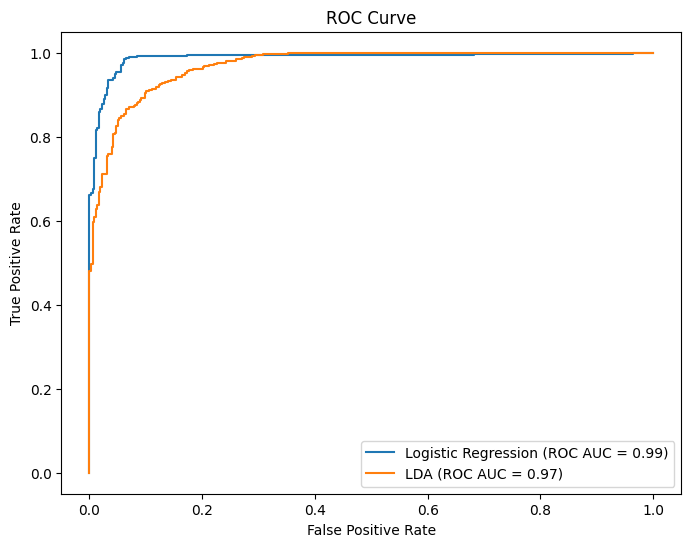

In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, confusion, roc_auc

# Evaluate Logistic Regression
logreg_train_acc, logreg_train_conf, logreg_train_roc_auc = evaluate_model(y_train, logreg_train_preds)
logreg_test_acc, logreg_test_conf, logreg_test_roc_auc = evaluate_model(y_test, logreg_test_preds)

# Evaluate LDA
lda_train_acc, lda_train_conf, lda_train_roc_auc = evaluate_model(y_train, lda_train_preds)
lda_test_acc, lda_test_conf, lda_test_roc_auc = evaluate_model(y_test, lda_test_preds)

# Plot ROC curves
def plot_roc(y_true, y_pred_probs, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    roc_auc = roc_auc_score(y_true, y_pred_probs)  # Calculate ROC AUC score
    plt.plot(fpr, tpr, label=f'{model_name} (ROC AUC = {roc_auc:.2f})')  # Include the calculated ROC AUC
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

logreg_test_pred_probs = logreg_model.predict_proba(X_test)[:, 1]
lda_test_pred_probs = lda_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
plot_roc(y_test, logreg_test_pred_probs, 'Logistic Regression')
plot_roc(y_test, lda_test_pred_probs, 'LDA')
plt.show()

***ABOVE CODE EXPLANATION***

First, the `evaluate_model` function calculates accuracy, confusion matrix, and ROC AUC score for a given set of true and predicted labels. These metrics offer insights into the models' classification performance.

Both Logistic Regression and LDA models are evaluated using this function on both training and testing data. The evaluation results, including accuracy, confusion matrix, and ROC AUC score, are stored.

The plot_roc function is employed to create ROC curves. These curves visualize the models' performance in distinguishing between classes by depicting the true positive rate against the false positive rate. The ROC AUC score is added to the legend of each curve.

Predicted probabilities from both models are obtained using the predict_proba method. These probabilities are then used to plot the ROC curves for Logistic Regression and LDA models in a single figure.

### 2.8. COMPARING FURTHER BETWEEN MODELS

In [ ]:
# Compare model performance
print("Model Comparison:")
print("========================================")
print("Logistic Regression:")
print(f"Train Accuracy: {logreg_train_acc:.4f}, Test Accuracy: {logreg_test_acc:.4f}")
print(f"ROC AUC: {logreg_test_roc_auc:.4f}")
print("\nConfusion Matrix:")
print(logreg_test_conf)
print("\nLinear Discriminant Analysis:")
print(f"Train Accuracy: {lda_train_acc:.4f}, Test Accuracy: {lda_test_acc:.4f}")
print(f"ROC AUC: {lda_test_roc_auc:.4f}")
print("\nConfusion Matrix:")
print(lda_test_conf)
print("========================================")

Model Comparison:
Logistic Regression:
Train Accuracy: 0.9809, Test Accuracy: 0.9801
ROC AUC: 0.9323

Confusion Matrix:
[[ 312   46]
 [  21 2987]]

Linear Discriminant Analysis:
Train Accuracy: 0.9600, Test Accuracy: 0.9605
ROC AUC: 0.8512

Confusion Matrix:
[[ 255  103]
 [  30 2978]]


Based on the provided model comparison metrics:

**Logistic Regression:**

1. Both on the training and testing data, the Logistic Regression model performs consistently well with high accuracy.
2. The ROC AUC score of 0.9323 indicates the model's ability to effectively distinguish between classes.
3. The confusion matrix reveals 312 true positive predictions, 2987 true negatives, 46 false positives, and 21 false negatives.

**Linear Discriminant Analysis (LDA):**

1. The Linear Discriminant Analysis model also demonstrates good accuracy on both the training and testing data.
2. The ROC AUC score of 0.8512 suggests a reasonable performance in separating classes.
3. The confusion matrix indicates 255 true positive predictions, 2978 true negatives, 103 false positives, and 30 false negatives.


In conclusion, both models show strong classification capabilities with high accuracy on the test set. Logistic Regression exhibits a slightly better ROC AUC score, suggesting a better overall discrimination ability. The confusion matrices further confirm the models' effectiveness in making accurate predictions.

### 2.9. CONCLUSION

1. Most of the estimated impact speeds were in the range of 10-24.
2. The distribution of gender was almost equal.
3. There were three main categories in the airbag deployment cateogry, namely "unavail", "nodeploy", and "deploy".
4. The occupant roles were drivers and passengers, with passenger being very less as compared to the drivers.
5. The presence of outliers in the "Survived" category's box indicates that there are some instances where occupants who survived the crashes were either significantly older compared to the majority of survivors.
6. The most important features for predicting the survival are; injSeverity, airbag category, year of accident, seatbelt, and dvcat (estimated impact speeds). Among these, "injSeverity", "Abcat", seatbelt", and "dvcat" have a negative correlation with the survival feature, while only the "year of accident" feature is postively correlated.